# Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

# 1. Importing necessary libraries 

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

import warnings
warnings.filterwarnings('ignore')

# 2. Load dataset 

In [43]:
fraud_data=pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [40]:
fraud_data_ohe=fraud_data.copy()
fraud_data_ohe

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# 3. Data Understanding

In [8]:
fraud_data.shape

(600, 6)

In [10]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [7]:
fraud_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

# 4. Data Preprocessing

In [11]:
fraud_data['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [44]:
l1=[]
for i in fraud_data['Undergrad']:
    if i=='YES':
        l1.append(1)
    else:
        l1.append(0)
fraud_data['Undergrad']=l1

l2=[]
for i in fraud_data['Urban']:
    if i=='YES':
        l2.append(1)
    else:
        l2.append(0)
fraud_data['Urban']=l2

l3=[]
for i in fraud_data['Marital.Status']:
    if i =='Divorced':
        l3.append(0)
    elif i=='Married':
        l3.append(1)
    else:
        l3.append(2)
fraud_data['Marital.Status']=l3

fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [45]:
l4=[]

for i in fraud_data['Taxable.Income']:
    if i<=30000:
        l4.append(1)  #Risky
    else:
        l4.append(0)  #Good
        
fraud_data['Taxable.Income']=l4
fraud_data.head(20)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
5,0,0,0,116382,0,0
6,0,0,0,80890,8,1
7,1,2,0,131253,3,1
8,0,2,0,102481,12,1
9,1,0,0,155482,4,1


In [56]:
fraud_data['Taxable.Income'].value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

In [46]:
fraud_data.dtypes

Undergrad          int64
Marital.Status     int64
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int64
dtype: object

## 4.2 Using One Hot Encoding to convert continuous data to categorical data

In [49]:
fraud_data_copy=pd.get_dummies(fraud_data_copy)
fraud_data_copy['Taxable.Income']=l4
fraud_data_copy

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,0,50047,10,1,0,0,0,1,0,1
1,0,134075,18,0,1,1,0,0,0,1
2,0,160205,30,1,0,0,1,0,0,1
3,0,193264,15,0,1,0,0,1,0,1
4,0,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,0,39492,7,0,1,1,0,0,0,1
596,0,55369,2,0,1,1,0,0,0,1
597,0,154058,0,1,0,1,0,0,0,1
598,0,180083,17,0,1,0,1,0,1,0


# 5. Model Building

## 5.1 Manual encoding

In [98]:
X=fraud_data.drop('Taxable.Income',axis=1)
y=fraud_data[['Taxable.Income']]

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [100]:
y.value_counts()

Taxable.Income
0                 476
1                 124
dtype: int64

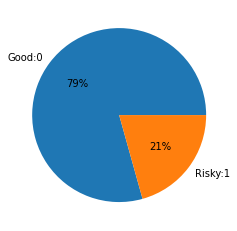

In [101]:
plt.pie(x=y.value_counts(),labels=['Good:0','Risky:1'], autopct='%1.0f%%')
plt.show()

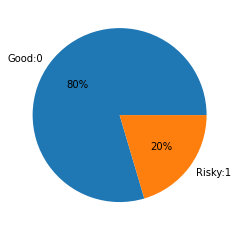

In [102]:
plt.pie(x=y_train.value_counts(),labels=['Good:0','Risky:1'], autopct='%1.0f%%')
plt.show()

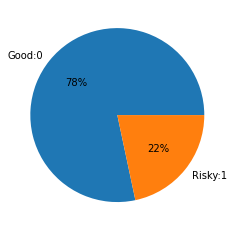

In [103]:
plt.pie(x=y_test.value_counts(),labels=['Good:0','Risky:1'], autopct='%1.0f%%')
plt.show()

## 5.2 OHE 

In [104]:
X_ohe=fraud_data.drop('Taxable.Income',axis=1)
y_ohe=fraud_data_copy[['Taxable.Income']]

In [105]:
X_ohe_train,X_ohe_test,y_ohe_train,y_ohe_test=train_test_split(X_ohe,y_ohe,test_size=0.2,random_state=123)

In [106]:
y_ohe.value_counts()

Taxable.Income
0                 476
1                 124
dtype: int64

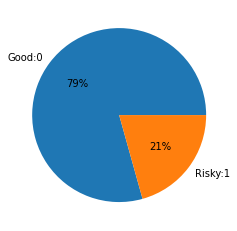

In [107]:
plt.pie(x=y_ohe.value_counts(),labels=['Good:0','Risky:1'], autopct='%1.0f%%')
plt.show()

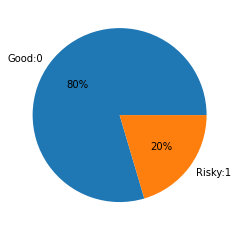

In [108]:
plt.pie(x=y_ohe_train.value_counts(),labels=['Good:0','Risky:1'], autopct='%1.0f%%')
plt.show()

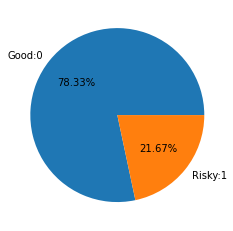

In [109]:
plt.pie(x=y_ohe_test.value_counts(),labels=['Good:0','Risky:1'], autopct='%1.2f%%')
plt.show()

# 6. Model Training

In [110]:
dt_model1=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=123)
dt_model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

In [111]:
dt_model2=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=123)
dt_model2.fit(X_ohe_train,y_ohe_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

# 7. Model Testing

In [118]:
y_train_pred=dt_model1.predict(X_train)

In [119]:
y_test_pred=dt_model1.predict(X_test)

In [120]:
y_ohe_train_pred=dt_model2.predict(X_ohe_train)

# 8. Model Evaluation

## 7.1 Model 1

In [121]:
print(confusion_matrix(y_train,y_train_pred))

[[380   2]
 [ 85  13]]


In [122]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       382
           1       0.87      0.13      0.23        98

    accuracy                           0.82       480
   macro avg       0.84      0.56      0.56       480
weighted avg       0.83      0.82      0.76       480



In [123]:
print(confusion_matrix(y_test,y_test_pred))

[[91  3]
 [25  1]]


In [124]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87        94
           1       0.25      0.04      0.07        26

    accuracy                           0.77       120
   macro avg       0.52      0.50      0.47       120
weighted avg       0.67      0.77      0.69       120



In [125]:
dt_model1.score(X_train,y_train)

0.81875

In [126]:
dt_model1.score(X_test,y_test)

0.7666666666666667

In [93]:
print(confusion_matrix(y_ohe_train,y_ohe_train_pred))

[[381   0]
 [ 91   8]]


In [127]:
print(classification_report(y_ohe_train,y_ohe_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       382
           1       0.87      0.13      0.23        98

    accuracy                           0.82       480
   macro avg       0.84      0.56      0.56       480
weighted avg       0.83      0.82      0.76       480



In [132]:
dt_model2.score(X_ohe_train,y_ohe_train).round(2)

0.82

In [133]:
dt_model1.score(X_ohe_test,y_ohe_test).round(2)

0.77

# 9. Model Deployment